<a href="https://colab.research.google.com/github/silviafiorellaym-create/PRACTICA-3/blob/main/ejemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame({
    "categoria": ["A", "B", "A", "C", "B", "A", "C", "C", "A", "B"],
    "valor": [10, 15, 7, 20, 13, 9, 22, 21, 14, 16],
    "grupo": ["X", "Y", "X", "Y", "X", "X", "Y", "Y", "X", "Y"],
    "target": [0, 1, 0, 1, 0, 0, 1, 1, 0, 1]
})

df


,categoria,valor,grupo,target
0,A,10,X,0
1,B,15,Y,1
2,A,7,X,0
3,C,20,Y,1
4,B,13,X,0
5,A,9,X,0
6,C,22,Y,1
7,C,21,Y,1
8,A,14,X,0
9,B,16,Y,1


Creación de df de ejemplo.

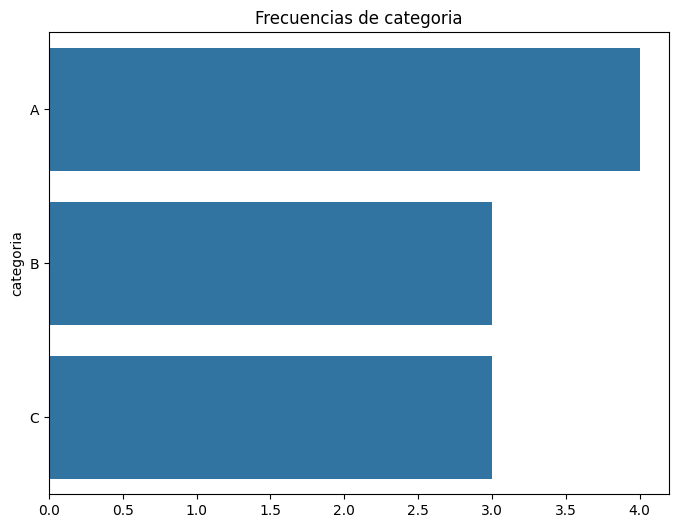

In [ ]:
from ctg_viz.plots.barplots import plot_barh
fig = plot_barh(df, "categoria")
plt.show()


Descipción
La función plot_barh es un creador de gráficos de barras horizontales, específicamente diseñados para:
Calcular las frecuencias de una columna categórica.
Graficarlas de forma ordenada de mayor a menor usando Seaborn.

Recomendación analítica:
Utiliza este gráfico para identificar categorías con mayor frecuencia y detectar distribuciones desequilibradas. Si observas clases con presencia muy baja, considera técnicas de balanceo (oversampling, undersampling) o agrupar categorías poco representadas.


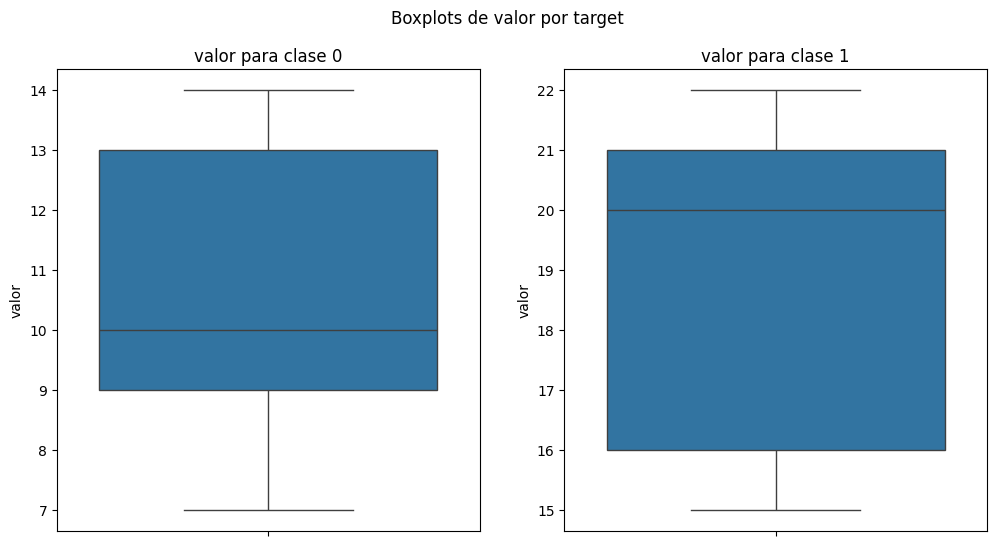

In [ ]:
from ctg_viz.plots.boxplots import plot_boxplot
fig = plot_boxplot(df, column="valor", target="target")
plt.show()


Descripción
Esta línea importa la función plot_boxplot desde el módulo boxplots, el cual forma parte del paquete ctg_viz.plots.
La función está diseñada para crear boxplots separados por clases, es decir, un boxplot para cada categoría del target.

Recomendación analítica:
El boxplot permite evaluar diferencias en la distribución de la variable valor entre clases del target. Úsalo para identificar patrones discriminativos o presencia de outliers. Si existen diferencias claras entre grupos, esta variable puede tener buen potencial predictivo.

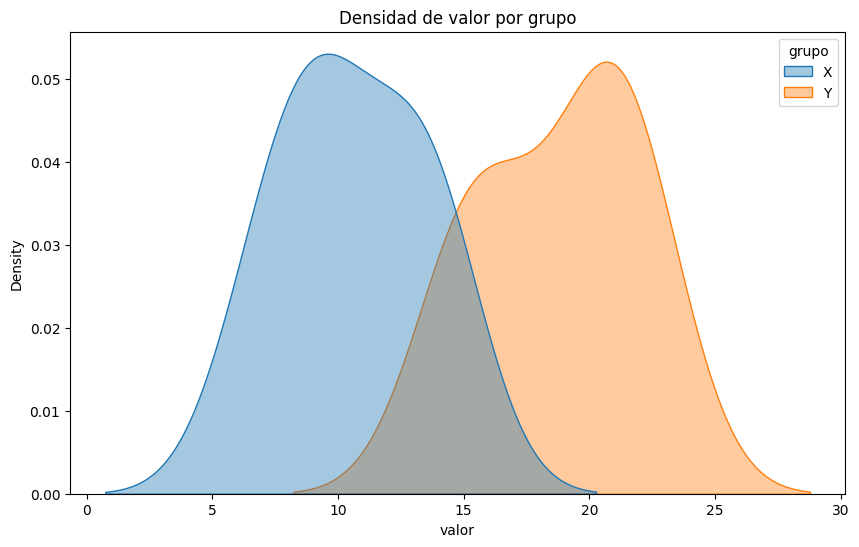

In [ ]:
from ctg_viz.plots.density import plot_density
fig = plot_density(df, column="valor", group="grupo")
plt.show()


Descripción
Esta línea importa la función plot_density desde el módulo density, dentro del paquete ctg_viz.plots.
Esta función está diseñada para generar un gráfico de densidad (KDE) comparando varias clases o grupos.

Recomendación analítica:
La densidad ayuda a comparar cómo se comporta una misma variable entre distintos grupos. Si las curvas se superponen mucho, la variable tiene bajo poder de separación. Si son claramente distintas, puede ser relevante para clasificación o segmentación.

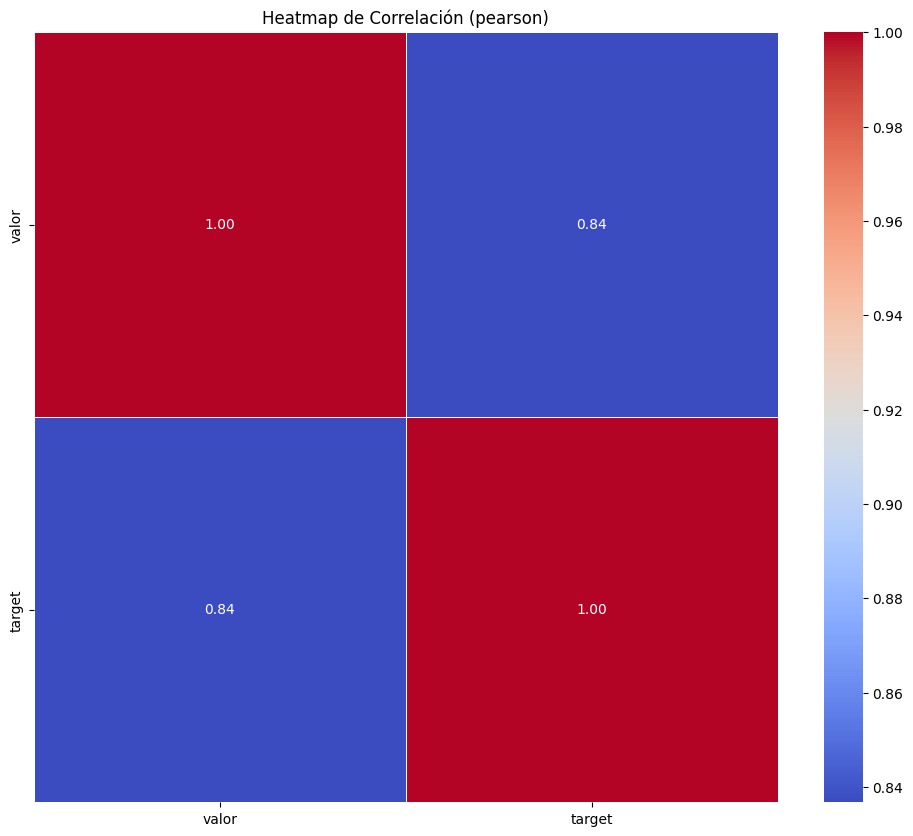

In [ ]:
from ctg_viz.plots.heatmap import plot_heatmap
fig = plot_heatmap(df, method="pearson")
plt.show()


Descripción
Esta línea importa la función plot_heatmap desde el módulo heatmap, dentro del paquete ctg_viz.plots.
La función está diseñada para generar un mapa de calor (heatmap) que muestra la correlación entre las variables numéricas del DataFrame.

Recomendación analítica:
Este mapa de calor permite identificar correlaciones fuertes entre variables. Úsalo para seleccionar características relevantes, reducir multicolinealidad y optimizar modelos. Considera eliminar variables con correlaciones superiores a 0.9 entre sí.

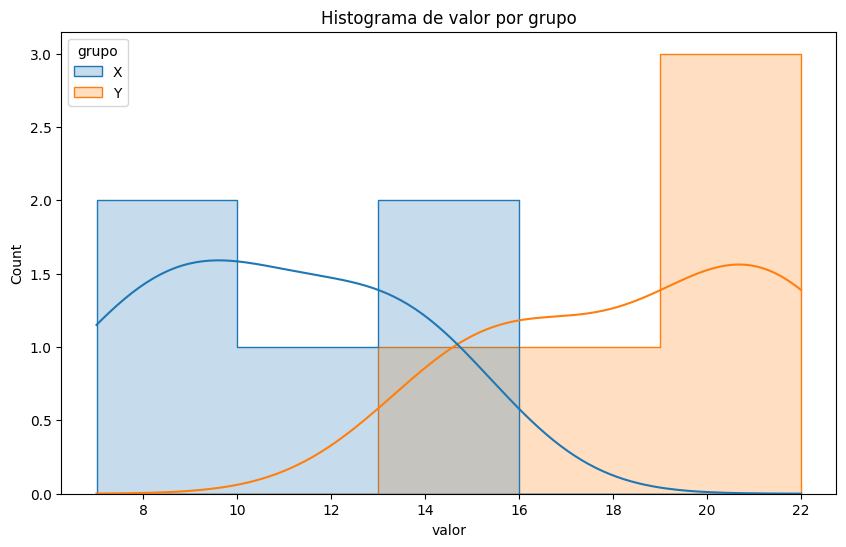

In [ ]:
from ctg_viz.plots.histograms import plot_histogram
fig = plot_histogram(df, column="valor", group="grupo", bins=5)
plt.show()



Descripción
Esta línea importa la función plot_histogram ubicada en el módulo histograms dentro del paquete ctg_viz.plots.
La función está diseñada para crear histogramas avanzados, con la opción de incluir curvas de densidad (KDE) y separación por grupos.

Recomendación analítica:
El histograma segmentado permite observar la distribución general y cómo se comporta según grupos. Si hay asimetrías marcadas, considera transformaciones (log, sqrt). Si los grupos presentan diferentes formas, la variable podría mejorar un modelo de clasificación.

In [ ]:
from ctg_viz import categorization
resumen = categorization.check_data_completeness_silvia_rico_valdez(df)
resumen


,columna,nulos,completitud_pct,tipo_dato,clasificacion,cardinalidad,media,desviacion_std,min,max,moda
0,categoria,0,100.0,object,Discretas,3,NaN,NaN,NaN,NaN,A
1,valor,0,100.0,int64,Discretas,10,14.7,5.17,7.0,22.0,7
2,grupo,0,100.0,object,Discretas,2,NaN,NaN,NaN,NaN,X
3,target,0,100.0,int64,Discretas,2,0.5,0.53,0.0,1.0,0


Descripción
Esta línea ejecuta la función check_data_completeness_silvia_rico_valdez, la cual realiza un análisis detallado del DataFrame df.
La función devuelve un DataFrame resumen con información esencial para el preprocesamiento y análisis exploratorio.

Recomendación analítica:
Este resumen es útil para entender el nivel de completitud del dataset. Si detectas muchas variables con valores faltantes, define estrategias de imputación adecuadas o considera eliminar columnas con muy baja información útil.

In [ ]:
import ctg_viz.preprocessing as pr
df_limpio = pr.clean_ctg_data(df, numeric_strategy="mean", outlier_method="iqr")
df_limpio


,categoria,valor,grupo,target
0,A,6.625,X,-0.5
1,B,6.625,Y,-0.5
2,A,6.625,X,-0.5
3,C,6.625,Y,-0.5
4,B,6.625,X,-0.5
5,A,6.625,X,-0.5
6,C,6.625,Y,-0.5
7,C,6.625,Y,-0.5
8,A,6.625,X,-0.5
9,B,6.625,Y,-0.5


Descripción
Importa el módulo preprocessing del paquete ctg_viz.
Se asigna el alias pr para facilitar su uso.
Este módulo contiene funciones diseñadas para limpiar, transformar y preparar datos del dataset CTG.

Recomendación analítica:
Tras la limpieza, revisa cómo cambiaron las variables y si la imputación afectó su distribución. El método IQR es adecuado para datos no normales; si los datos son aproximadamente gaussianos, considera z-score como alternativa.